# Introduction - Regression

<div class="alert alert-block alert-info">
<ul>
    <li> <b>Dataset #2: </b|> Feature Dataset => Predict House Sales Price </li>
    <li> <b> Source: </b> House Prices: Advanced Regression Techniques </li> 
    <li> <a> (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv) </a> </li>
    <li> <b> Test Data is NOT seperate from Train Data </b></li>
</div>

In [204]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection as sklms
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score

In [205]:
train_data = '../datasets/house-prices-advanced-regression-techniques/train.csv'
test_data = '../datasets/house-prices-advanced-regression-techniques/test.csv'

train_data = pd.read_csv(train_data)
test_data = pd.read_csv(test_data)

# a) Data Exploration

In [206]:
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [207]:
train_data.head()
test_data.head()

# need to use cross validation because the test data does not have sale price
# so can only use the train data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


**Test data is missing sales price, so need to use train data only**

In [208]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [209]:
Y = train_data['SalePrice']
train_data = train_data.drop(columns=['Id'])

Based on the data description that was given, MSSubClass, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MoSold, YrSold can also be considered categorical even though it is listed as a numerical value, and ID is just an identifier, so it is not a feature

In [210]:
numerical_cols = train_data.select_dtypes(include=['int', 'float'])
print(numerical_cols.shape)
# numerical_cols = numerical_cols.drop(columns=['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold', 'GarageYrBlt'])
numerical_cols = numerical_cols.drop(columns=['MSSubClass', 'OverallQual', 'OverallCond'])
numerical_cols.head()

(1460, 37)


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [211]:
categorical_cols = train_data.select_dtypes(include=['category', 'object'])
categorical_cols = pd.concat([categorical_cols, train_data[['MSSubClass', 'OverallQual', 'OverallCond']]], axis=1, sort=False)
print(categorical_cols.shape)
categorical_cols.head()

(1460, 46)


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,Y,NaN,NaN,NaN,WD,Normal,60,7,5
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Y,NaN,NaN,NaN,WD,Normal,20,6,8
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,Y,NaN,NaN,NaN,WD,Normal,60,7,5
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,TA,Y,NaN,NaN,NaN,WD,Abnorml,70,7,5
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,TA,Y,NaN,NaN,NaN,WD,Normal,60,8,5


Added the cols that were under numerical, to categorical, just for future reference and to see what the distribution is between numerical and categorical. 

In [212]:
print(f'Total Samples: {train_data.shape[0]}')
print(f'Total Features: {train_data.shape[1]- 1}') # -1 for the SalesPrice
print(f'Categorical Features: {categorical_cols.shape[1]}')
print(f'Numerical Features: {numerical_cols.shape[1]}')
categorical_col_names = categorical_cols.columns
numerical_col_names = numerical_cols.columns
print('======================')
print(f'Categorical Cols: {categorical_col_names}')
print(f'Numerical Cols: {numerical_col_names}')

Total Samples: 1460
Total Features: 79
Categorical Features: 46
Numerical Features: 34
Categorical Cols: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual',
       'OverallCond'],
      dtype='object')
Numerical Cols: Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndF

There are more categorical vars in this dataset, might have sparsity if we end up doing one hot encoding, something to look out for.

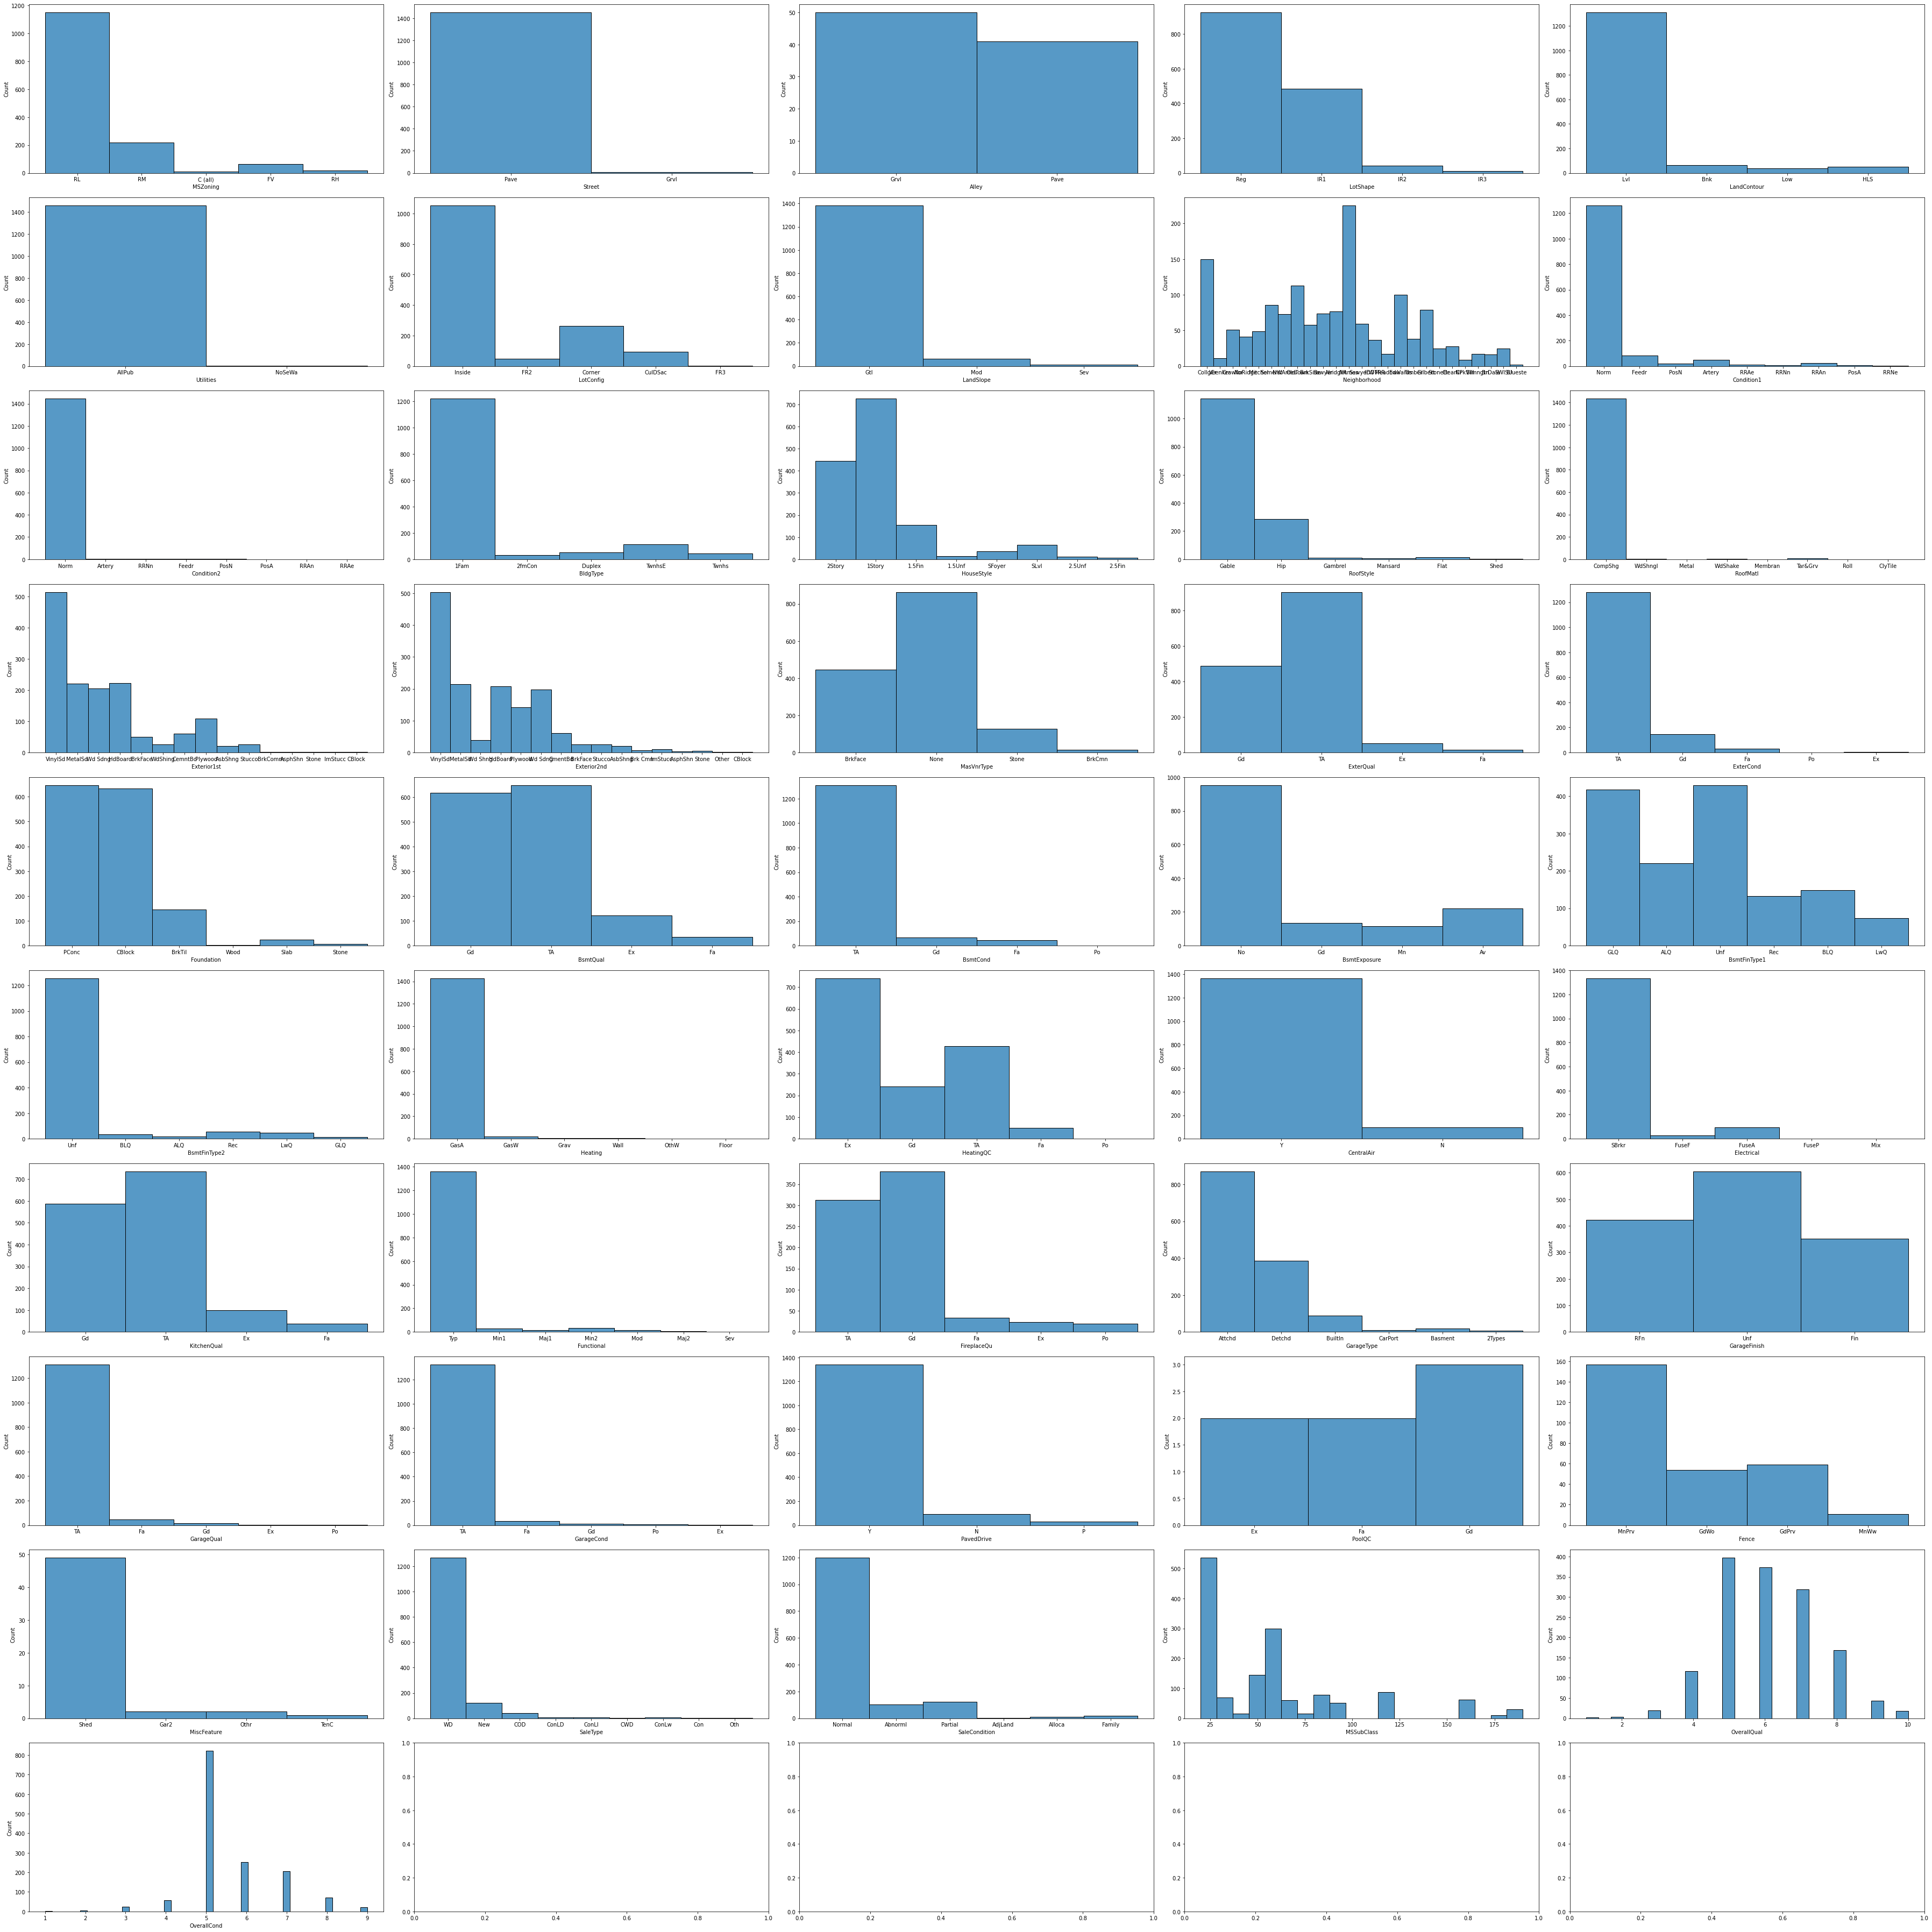

In [213]:
# histogram of the categorical cols
categorical_columns = list(categorical_cols.columns)
fig, axes = pyplot.subplots(10, 5, figsize=(50,50))
counter_x = 0
counter_y = 0
for col in categorical_columns:
    if counter_y > 4:
        counter_x += 1
        counter_y = 0
        
    sns.histplot(train_data[col].dropna(), ax=axes[counter_x][counter_y])
    counter_y += 1
    pyplot.tight_layout()


Some of the categorical values end up being a lot more common than the other ones. Also, for the N/A, seems like it is just default if it is nto specified (aka No Fireplace translates to N/A in dataset). Overall Quality and Overall Condition seems to be normally distributed

In [214]:
s = train_data.isna().sum()
na_cols = s[lambda x: x!=0]
print(f'Columns with N/A in them: \n{na_cols}')

Columns with N/A in them: 
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


This shows number of N/A in dataset, for some of these col its pretty large. Might have to investigate further to see what this really means, also might be a good idea to fill in these values if they are categorical to the default.

LotFrontage
LotArea
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


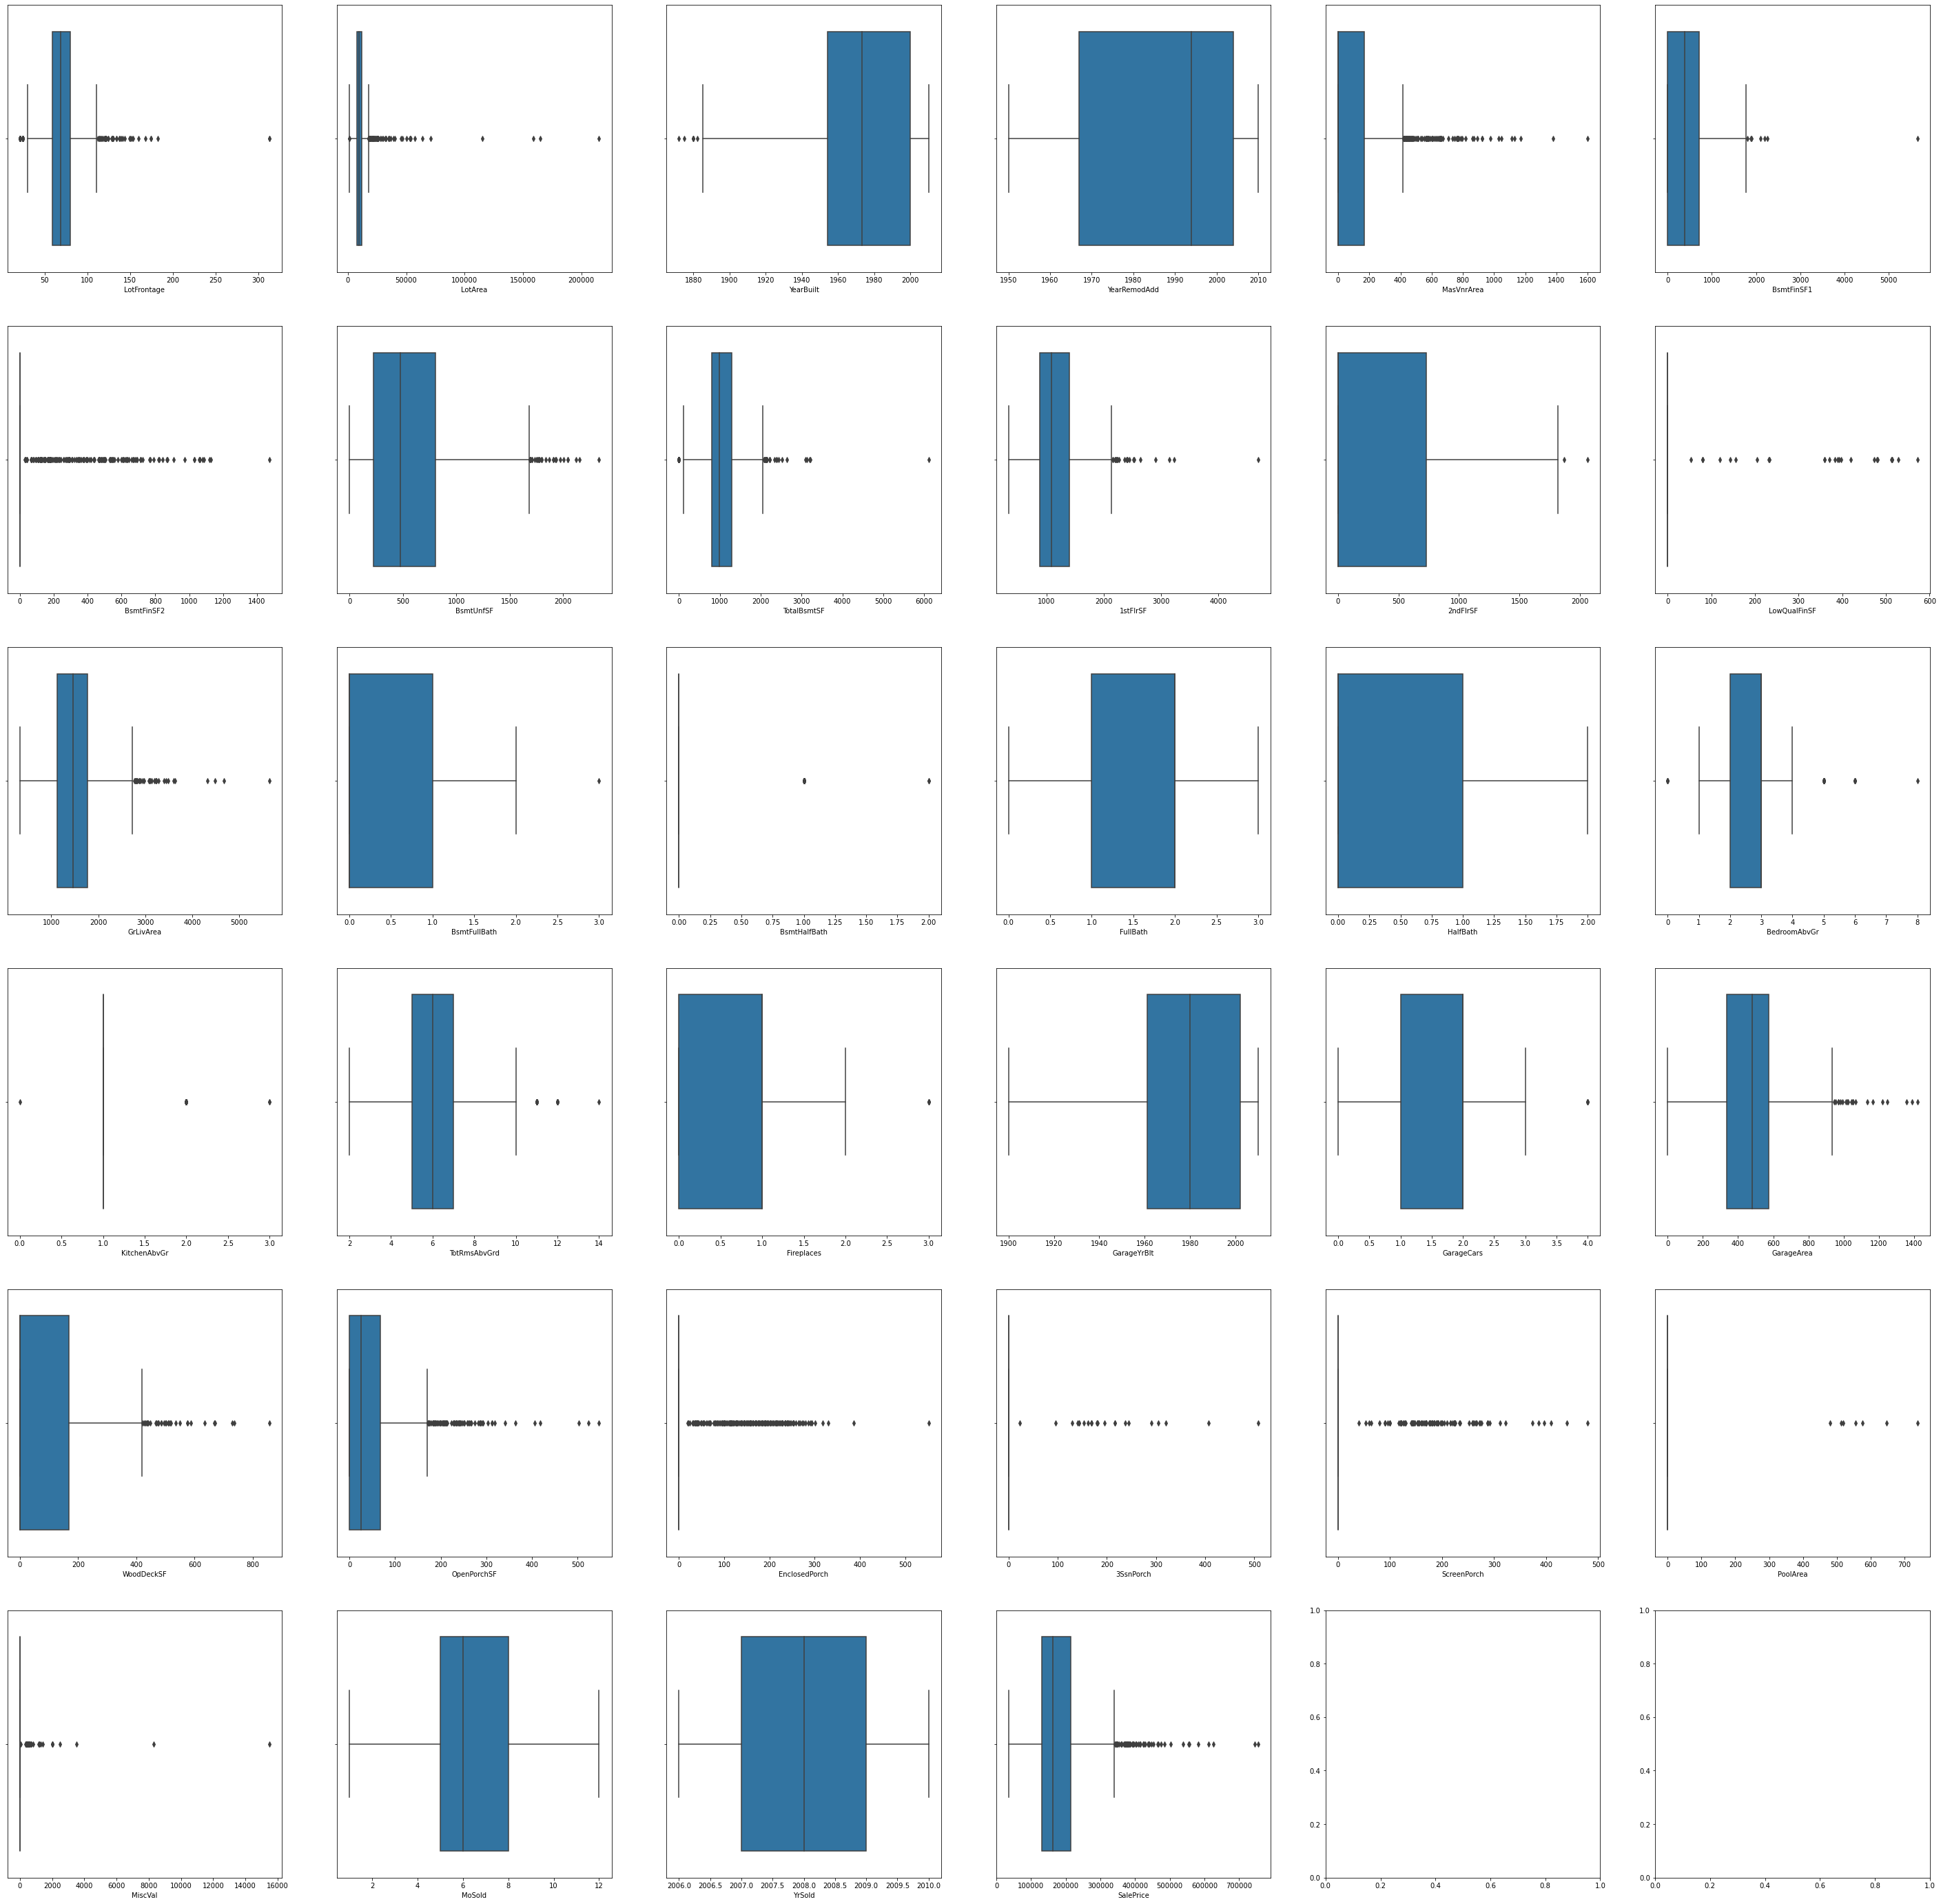

In [215]:
# histogram of the categorical cols
numerical_columns = list(numerical_cols.columns)
fig, axes = pyplot.subplots(6, 6, figsize=(50,50))
counter_x = 0
counter_y = 0
for col in numerical_columns:
    print(col)
    if counter_y > 5:
        counter_x += 1
        counter_y = 0
        
    sns.boxplot(x=train_data[col], ax=axes[counter_x][counter_y])
    counter_y+=1


There are a lot of outliers in some of the varibales. It looks like some of the box plots have mean very close to 0, it probably has a lot of 0 values in some of these columns which is bringing down the mean. Another noticeable thing is the bedroom/bath size for the house, seems like it only fits within a very specific distribution.

(Holtz, Yan. “#25 Histogram with Several Variables: Seaborn.”)

In [216]:
train_data['MiscVal']

0          0
1          0
2          0
3          0
4          0
        ... 
1455       0
1456       0
1457    2500
1458       0
1459       0
Name: MiscVal, Length: 1460, dtype: int64

Misc val is interesting to see that most values are 0, it is associated with Misc_Feature col and thats why there is a lot of NaN

In [217]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


LotFrontage
LotArea
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


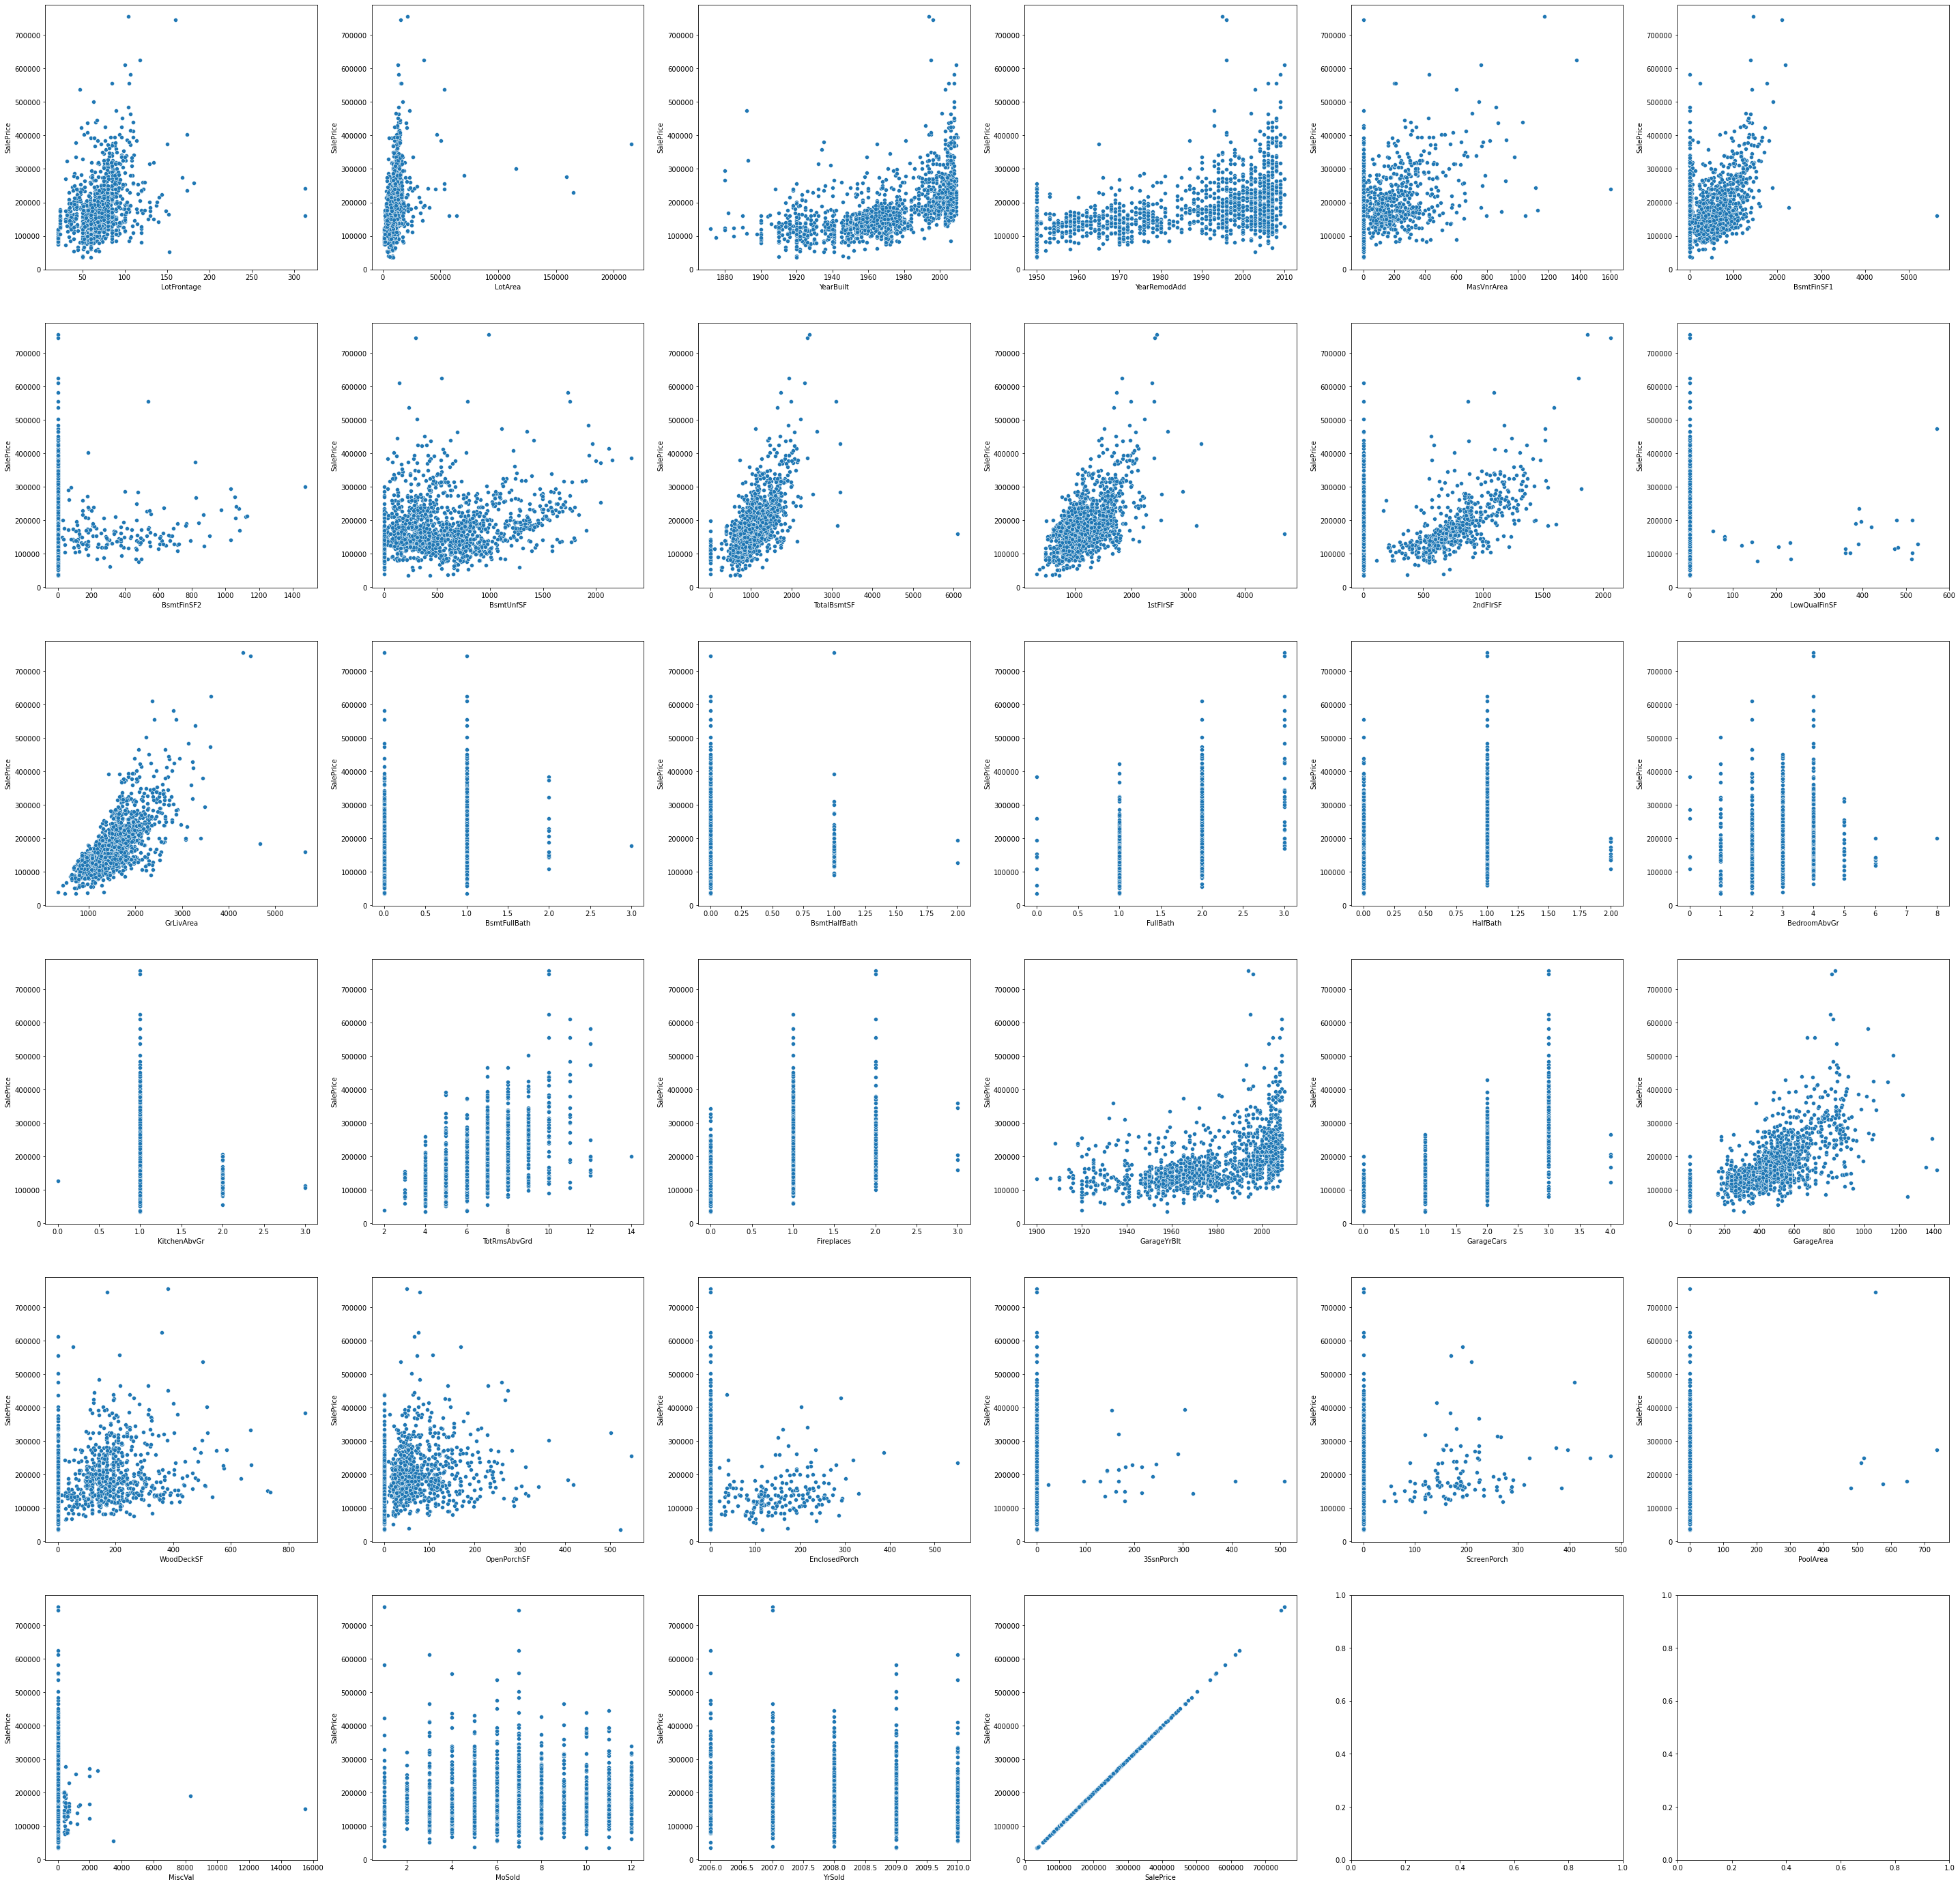

In [218]:
numerical_columns = list(numerical_cols.columns)
fig, axes = pyplot.subplots(6, 6, figsize=(50,50))
counter_x = 0
counter_y = 0
for col in numerical_columns:
    print(col)
    if counter_y > 5:
        counter_x += 1
        counter_y = 0
        
    sns.scatterplot(x=train_data[col], y=Y, ax=axes[counter_x][counter_y])
    counter_y+=1

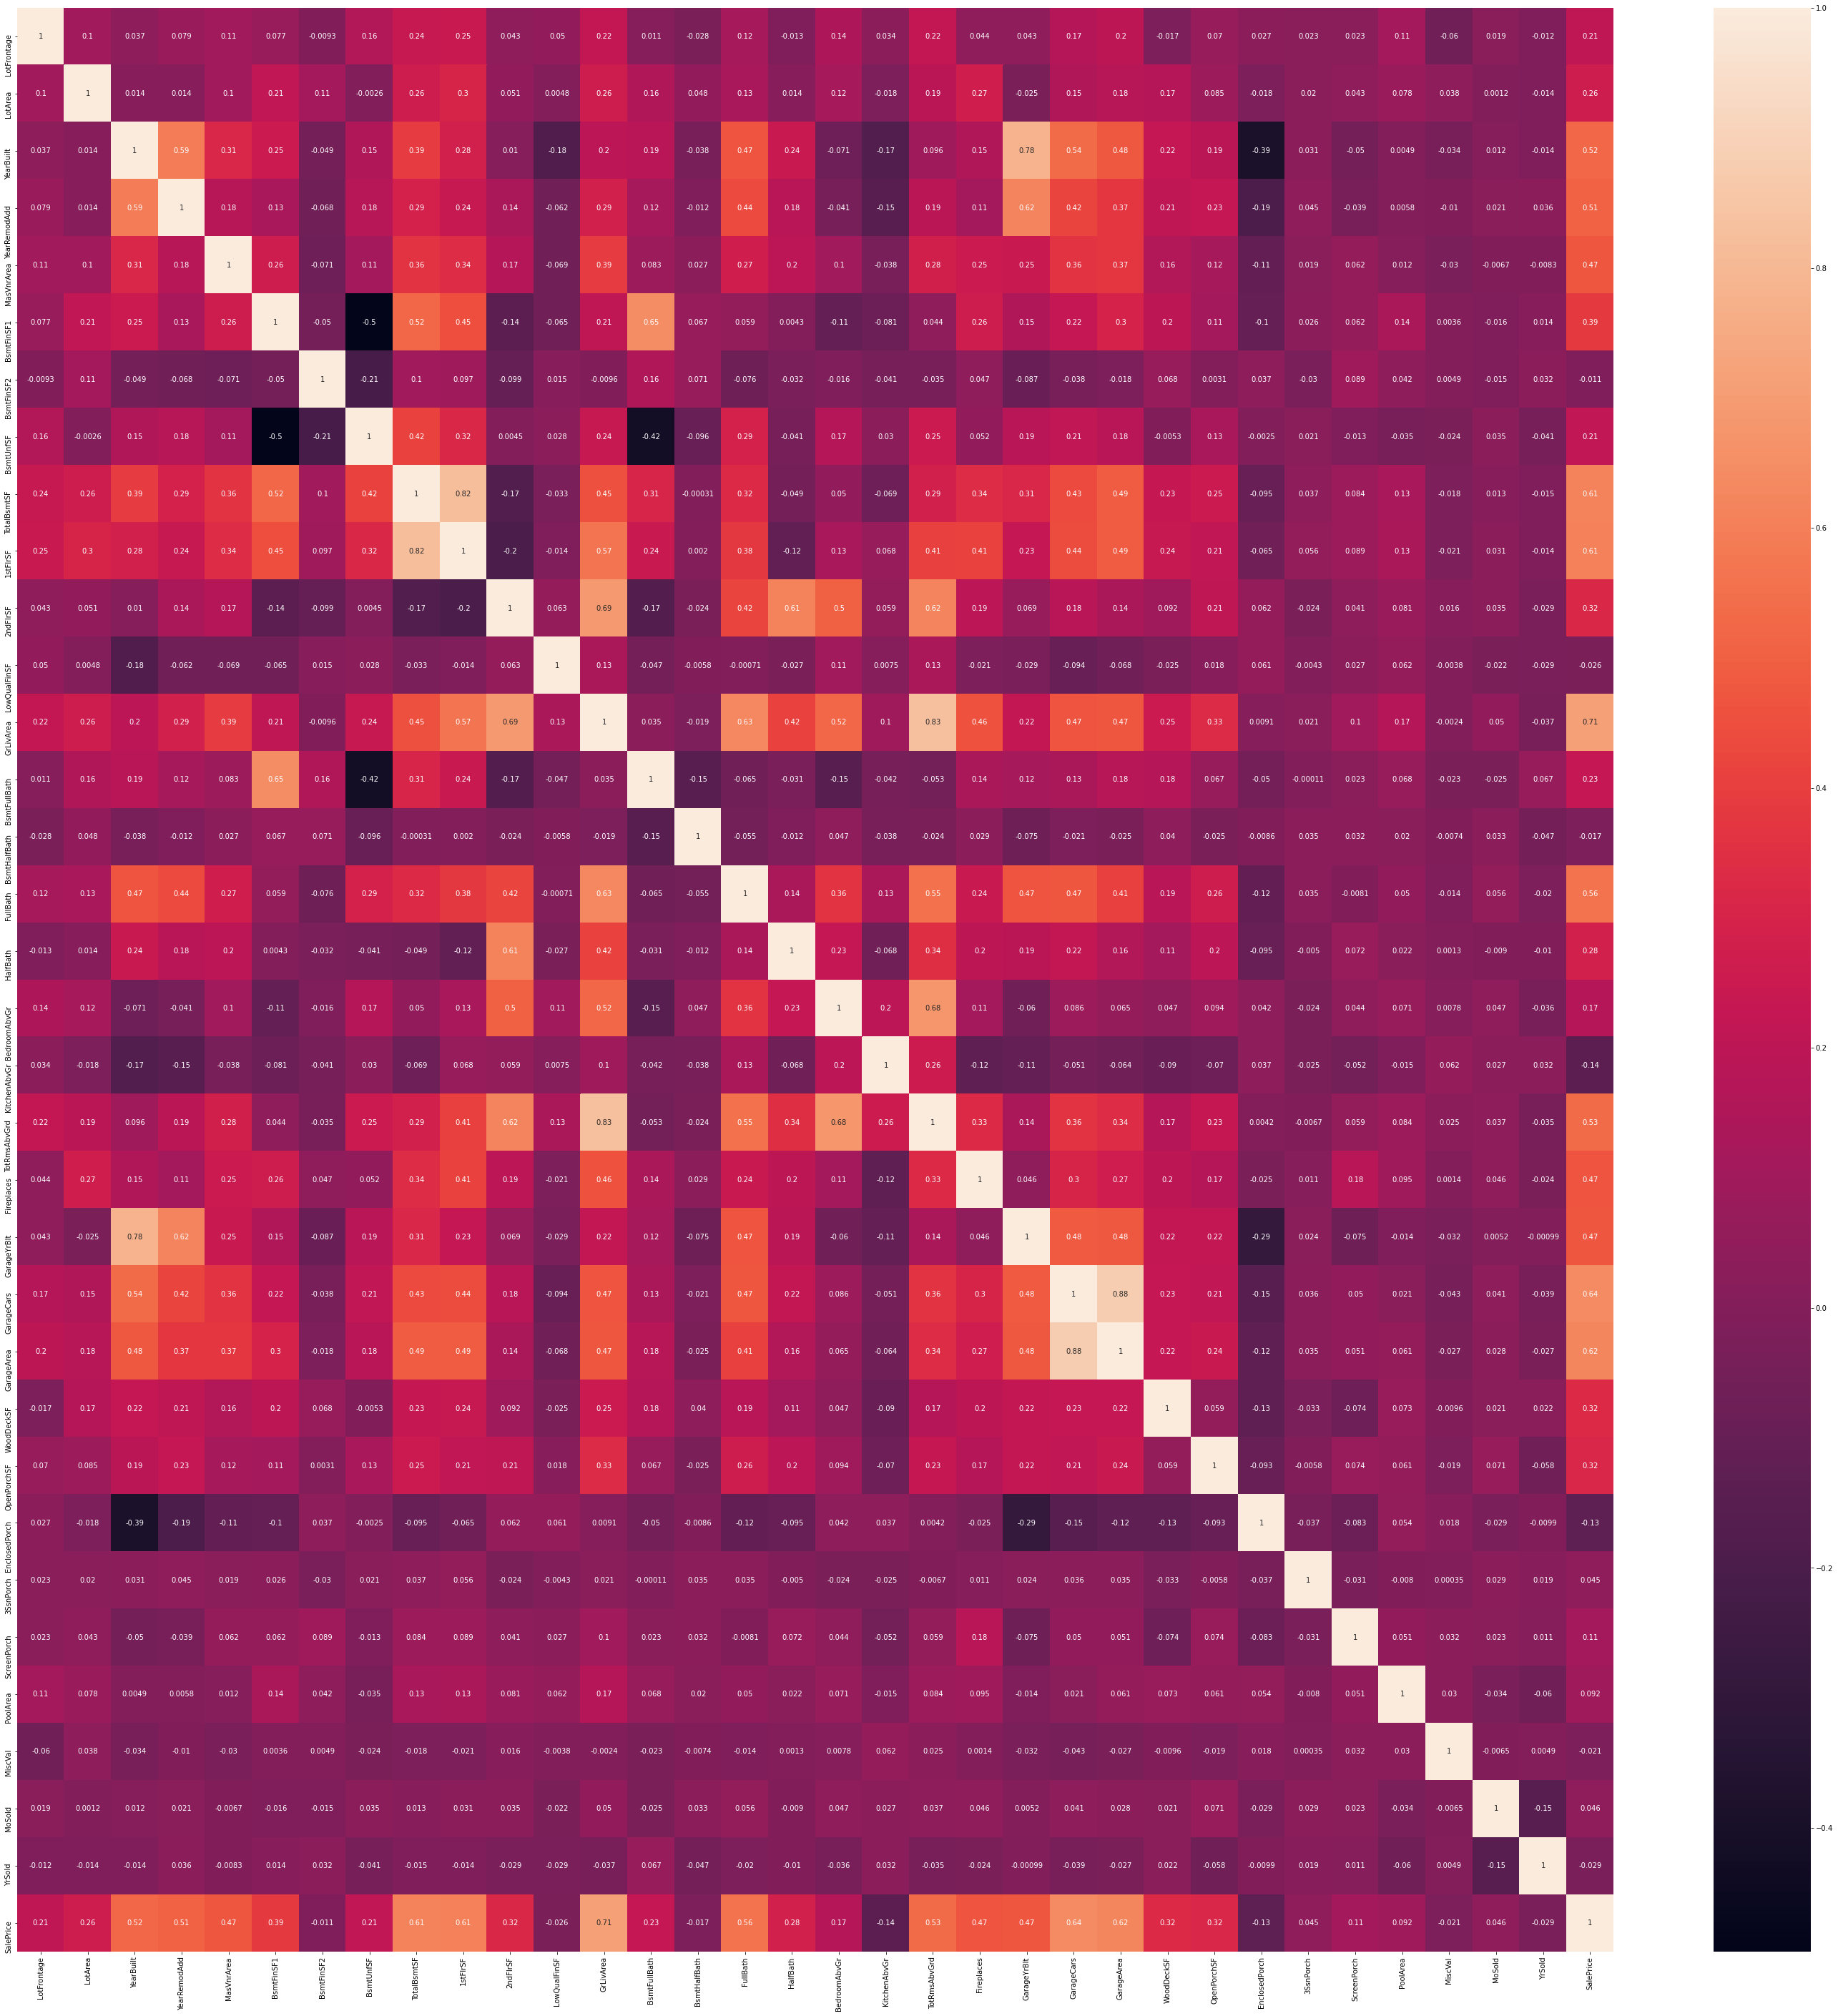

In [219]:
fig = pyplot.figure(figsize=(50,50))
corr_matrix = train_data_dummies[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True)
pyplot.show()

There seems to be some correlation with some of these varibles with sales price. The year build columns are interesting because it shows how many houses are made more recently (almost looks exponential). "Gr Liv area" and the square foot of some of the rooms/house definitely show a good trend. 


**Key Observations:** 
- There are many categorical variables compared to numerical
- There are many NaN values
- Some features have clear correlation to sales price
- Many of the categorical values are interesting to see, and have both normal and not normal distribution

# b) Pre Processing

Based on what we learned, there are a decent amount of columns with N/A filled in, both categorical values, and numerical values

**Preprocessing to do**
- Fill in data
- One hot encoding 
- Standardize (?)

In [220]:
na_cols

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [221]:
train_data['LotFrontage'] = train_data['LotFrontage']

For all the Categorical Values, mark as text NA
For all the Numerical Values fill in with the mean

In [222]:
na_cols_df = train_data[list(na_cols.index)]
na_cols_df

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [223]:
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(0)
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(0)
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mean())


In [224]:
na_cols_list = list(na_cols.index)
na_cols_list.remove('LotFrontage')
na_cols_list.remove('MasVnrArea')

In [225]:
na_cols_categorical = na_cols_list
na_cols_categorical

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

- Will be repeats in one hot encoding (Not having garage spans to multiple columns (could potentially be a problem)) For instance GarageType, GararageYrBlt, etc will all be related to Garage and if there is a N/A, that value will mean the same thing across all columns

In [226]:
for col in na_cols_list:
    train_data[col] = train_data[col].fillna('N/A')

In [227]:
s = train_data.isna().sum()
na_cols = s[lambda x: x!=0]
print(f'Columns with N/A in them: \n{na_cols}')

Columns with N/A in them: 
Series([], dtype: int64)


No more N/A in the dataset, made a check for it

In [228]:
# One hot encoding/label encoding for some of the vars

categorical_columns = list(categorical_cols.columns)
categorical_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass',
 'OverallQual',
 'OverallCond']

In [229]:
train_data_dummies = pd.get_dummies(train_data)

The reason I did not specify the categorical values was because if there was a numerical value that was categorical, I kept it as label encoding because attributes such as Overall_cond. This command will do it for all the other object/categorical values, which was desired.

In [230]:
train_data_dummies.shape

(1460, 305)

In [231]:
train_data_dummies['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [232]:
# Tried it with standardization
'''x = train_data_dummies.values #returns a numpy array
mean_datascaler = StandardScaler(with_mean=True, with_std=True)
x_scaled = mean_datascaler.fit_transform(x)
train_data_dummies = pd.DataFrame(x_scaled)
train_data_dummies'''

'x = train_data_dummies.values #returns a numpy array\nmean_datascaler = StandardScaler(with_mean=True, with_std=True)\nx_scaled = mean_datascaler.fit_transform(x)\ntrain_data_dummies = pd.DataFrame(x_scaled)\ntrain_data_dummies'

**Summary:**
- Filled in NA values
- One Hot NE
- Decided not to standardize/normalize -> to see if features with greater variance and mean, we can have different scales and lets see the weightage of each coefficent

# c) Feature Learning
- Did not perform any feature learning for this dataset
- Im going to assume all the features hold some sort of significance, and see how well ridge and lasso perform and which values get 0. The reason I am deciding to do this is to see which coeff actually did not end up mattering, and actually see which variables contribute to the regression output

# d) Machine Learning Methods

In [233]:
data = train_data_dummies
Y = data['SalePrice'] # class label
full_data = data
X = data.drop(columns=['SalePrice'])
print(Y.shape)
print(X.shape)

col_names = list(train_data_dummies.columns)


(1460,)
(1460, 304)


**Important Note:**
Since my test dataset was **not** given as seperate, my cross validation strategy is as follows for all of the following algorithms (except for OLS bc nothing needs to be tuned): 
 - Using Sklearn KFold function it splits the data into 10 seperate folds
 - Within each iteration of each fold, I split the train dataset for training and validation dataset, and I put the test set away
 - Then, I get the accuracy score and param value for each iterations
 - Then based on the best accuracy score I retrained the model with train = train + validation for that specific fold, and reported the test error for the specific fold that was put away
 - Then reported the average of all iterations

#  i. Ridge Regression

In [234]:
k_folds = 10
test_data_folds = []
train_data_folds = []
validation_data_folds = []

max_alpha = 0
kf = sklms.KFold(n_splits=10, shuffle=True)
kf.get_n_splits(X)
alpha = [0.5, 1, 3, 5, 7, 9, 11, 13, 15, 17]
counter = 0

ridge_values = []
for train_index, validation_index in kf.split(X):
    
    # SPLITTING LOGIC
    X_train, X_test = X.iloc[train_index], X.iloc[validation_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[validation_index]
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=1)
    test_data_folds.append((X_test, Y_test))
    train_data_folds.append((X_train, Y_train))
    validation_data_folds.append((X_val, Y_val))
    
    # MODEL TRAINING
    ridge_model = Ridge(alpha=alpha[counter], solver='cholesky', normalize=True)
    ridge_model.fit(X_train, Y_train)
    
    # VALIDATION RESULTS
    predicted = ridge_model.predict(X_val)
    r_squared = r2_score(Y_val, predicted)
    mean_squared_err = mean_squared_error(Y_val, predicted)
    ridge_values.append((r_squared, alpha[counter]))
    print(f'Iteration {counter + 1} with alpha: {alpha[counter]} Complete')
    print(f'R^2 : {r_squared}')
    print(f'Mean Squared Error : {mean_squared_err}')

    counter += 1

Iteration 1 with alpha: 0.5 Complete
R^2 : 0.8823439299908613
Mean Squared Error : 687629794.0524735
Iteration 2 with alpha: 1 Complete
R^2 : 0.7660205508877852
Mean Squared Error : 1546796388.5327485
Iteration 3 with alpha: 3 Complete
R^2 : 0.8101331200290858
Mean Squared Error : 1319240389.7966795
Iteration 4 with alpha: 5 Complete
R^2 : 0.7847412847422774
Mean Squared Error : 1473130630.5471456
Iteration 5 with alpha: 7 Complete
R^2 : 0.7053516709059626
Mean Squared Error : 1906886945.5805688
Iteration 6 with alpha: 9 Complete
R^2 : 0.7297843032529736
Mean Squared Error : 1485686565.1666305
Iteration 7 with alpha: 11 Complete
R^2 : 0.6781872419596118
Mean Squared Error : 1712041708.4073234
Iteration 8 with alpha: 13 Complete
R^2 : 0.540926277671312
Mean Squared Error : 4111924309.495101
Iteration 9 with alpha: 15 Complete
R^2 : 0.5467604664881681
Mean Squared Error : 3468115665.638758
Iteration 10 with alpha: 17 Complete
R^2 : 0.5207883107549929
Mean Squared Error : 3620705586.05514

**Ridge Regression NOTES**

Ridge regression uses L2 penalty to determine best coeff, and can be solved in closed form

`Ridge(alpha=alpha[counter], solver='cholesky', normalize=True)`
- Alpha -> Parameter to be tuned on the , this is opposite then C on svc, and logistic. So if alpha -> inf, coeff should be 0
- solver='cholesky for the closed-form soln we did in class using linalg'
- normalize set to true so coeff arent penalized heavily simply bc they are larger

(“Sklearn.linear_model.Ridge¶.”)

In [235]:
r_squared, best_alpha = max(ridge_values, key = lambda i : i[0])
print(f'Best R^2: {r_squared}\nBest Alpha(L2 Regularization) : {best_alpha}')

Best R^2: 0.8823439299908613
Best Alpha(L2 Regularization) : 0.5


In [236]:
# Fit model using all the training fold and validation fold

tot_rsquare_error = []
tot_mean_squared_error = []
tot_explained_variance_score = []

for i in range(0,5):
    X_train = train_data_folds[i][0].append(validation_data_folds[i][0])
    Y_train = train_data_folds[i][1].append(validation_data_folds[i][1])
    X_test = test_data_folds[i][0]
    Y_test = test_data_folds[i][1]
    
    # Learn using the other two folds not used for testing 
    ridge_model = Ridge(alpha=best_alpha, solver='cholesky', normalize=True)
    ridge_model.fit(X_train, Y_train)
    
    predicted = ridge_model.predict(X_test)
    r_squared = r2_score(Y_test, predicted)
    mean_squared_err = mean_squared_error(Y_test, predicted)
    
    tot_rsquare_error.append(r_squared)
    tot_mean_squared_error.append(mean_squared_err)
    tot_explained_variance_score.append(explained_variance_score(Y_test, predicted))
    
ridge_r_square = sum(tot_rsquare_error)/len(tot_rsquare_error)
explained_ridge = sum(tot_explained_variance_score)/len(tot_explained_variance_score)

print(f'Mean Squared Error: {sum(tot_mean_squared_error)/len(tot_mean_squared_error)}')
print(f'R^2 Value {sum(tot_rsquare_error)/len(tot_rsquare_error)}')
print(f'Explained Variance Score: {sum(tot_explained_variance_score)/len(tot_explained_variance_score)}')

Mean Squared Error: 871024479.3094857
R^2 Value 0.8422057916973135
Explained Variance Score: 0.8444058654473249


In [237]:
print(f'Ridge # Coeff: {304 - np.count_nonzero(ridge_model.coef_)}')
list_coeff_ridge = list(zip(ridge_model.coef_, col_names))
coeff_ridge_0 = [item[1] for item in list_coeff_ridge if item[0] == 0]
print(coeff_ridge_0)

Ridge # Coeff: 1
['RoofMatl_Membran']


# ii. Lasso

In [238]:
k_folds = 10
test_data_folds = []
train_data_folds = []
validation_data_folds = []

max_alpha = 0
kf = sklms.KFold(n_splits=10, shuffle=True)
kf.get_n_splits(X)
alpha = [0.5, 1, 3, 5, 7, 9, 11, 13, 15, 17]
counter = 0
lasso_values = []
tot_explained_variance_score = []

for train_index, validation_index in kf.split(X):
    # SPLITTING LOGIC
    X_train, X_test = X.iloc[train_index], X.iloc[validation_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[validation_index]
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=1)
    test_data_folds.append((X_test, Y_test))
    train_data_folds.append((X_train, Y_train))
    validation_data_folds.append((X_val, Y_val))
    
    
    # MODEL TRAINING
    lasso_model = Lasso(alpha=alpha[counter], max_iter=15000, tol=0.075, normalize=True)
    lasso_model.fit(X_train, Y_train)
    
    # VALIDATION RESULTS
    predicted = lasso_model.predict(X_val)
    r_squared = r2_score(Y_val, predicted)
    mean_squared_err = mean_squared_error(Y_val, predicted)
    
    lasso_values.append((r_squared, alpha[counter]))
    
    print(f'Iteration {counter + 1} with alpha: {alpha[counter]} Complete')
    print(f'R^2 : {r_squared}')
    print(f'Mean Squared Error : {mean_squared_err}')
    
    counter += 1

Iteration 1 with alpha: 0.5 Complete
R^2 : 0.6599856778135427
Mean Squared Error : 2358495839.7477818
Iteration 2 with alpha: 1 Complete
R^2 : 0.821596398291832
Mean Squared Error : 1257241947.7161825
Iteration 3 with alpha: 3 Complete
R^2 : 0.8749074164196741
Mean Squared Error : 663084361.5481058
Iteration 4 with alpha: 5 Complete
R^2 : 0.8531750106897049
Mean Squared Error : 603026499.0673947
Iteration 5 with alpha: 7 Complete
R^2 : 0.5604844368344362
Mean Squared Error : 2340373791.1820445
Iteration 6 with alpha: 9 Complete
R^2 : 0.8229703754634091
Mean Squared Error : 1061906191.7609223
Iteration 7 with alpha: 11 Complete
R^2 : 0.8408428834287802
Mean Squared Error : 1253981371.0946991
Iteration 8 with alpha: 13 Complete
R^2 : 0.5003274421567656
Mean Squared Error : 2657633630.9735074
Iteration 9 with alpha: 15 Complete
R^2 : 0.8906610350472868
Mean Squared Error : 690155759.9241296
Iteration 10 with alpha: 17 Complete
R^2 : 0.8847843435631307
Mean Squared Error : 686189997.146811

**Lasso Regression NOTES**   
`Lasso(alpha=alpha[counter], max_iter=15000, tol=0.075)`
- Alpha -> Parameter to be tuned on the , this is opposite then C on svc, and logistic. So if alpha -> inf, coeff should be 0
- max_iter, tol= chosen bc lasso was not converging

(“Sklearn.linear_model.Lasso¶.”)

In [239]:
r_squared, best_alpha = max(lasso_values, key = lambda i : i[0])
print(f'Best R^2: {r_squared}\nBest Alpha(L1 Regularization) : {best_alpha}')

Best R^2: 0.8906610350472868
Best Alpha(L1 Regularization) : 15


In [240]:
# Fit model using all the training fold and validation fold

tot_rsquare_error = []
tot_mean_squared_error = []
tot_explained_variance_score = []

for i in range(0,5):
    X_train = train_data_folds[i][0].append(validation_data_folds[i][0])
    Y_train = train_data_folds[i][1].append(validation_data_folds[i][1])
    X_test = test_data_folds[i][0]
    Y_test = test_data_folds[i][1]

    # Learn using the other two folds not used for testing 
    lasso_model = Lasso(alpha=best_alpha, max_iter=15000, tol=0.075, normalize=True)
    lasso_model.fit(X_train, Y_train)
    
    predicted = lasso_model.predict(X_test)
    r_squared = r2_score(Y_test, predicted)
    mean_squared_err = mean_squared_error(Y_test, predicted)
    
    tot_rsquare_error.append(r_squared)
    tot_mean_squared_error.append(mean_squared_err)
    tot_explained_variance_score.append(explained_variance_score(Y_test, predicted))

lasso_r_square = sum(tot_rsquare_error)/len(tot_rsquare_error)
explained_lasso = sum(tot_explained_variance_score)/len(tot_explained_variance_score)
print(f'Average Mean Squared Error: {sum(tot_mean_squared_error)/len(tot_mean_squared_error)}')
print(f'Average R^2 Value {sum(tot_rsquare_error)/len(tot_rsquare_error)}')
print(f'Explained Variance Score: {sum(tot_explained_variance_score)/len(tot_explained_variance_score)}')

Average Mean Squared Error: 724269383.9429572
Average R^2 Value 0.8811513197642675
Explained Variance Score: 0.8826086521662606


In [241]:
print(f'Lasso # Coeff: {304 - np.count_nonzero(lasso_model.coef_)}')
list_coeff_lasso = list(zip(lasso_model.coef_, col_names))
coeff_lasso_0 = [item[1] for item in list_coeff_lasso if item[0] == 0]
print(coeff_lasso_0)

Lasso # Coeff: 161
['LotFrontage', 'LowQualFinSF', 'EnclosedPorch', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_FV', 'MSZoning_RH', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_N/A', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_NAmes', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_StoneBr', 'Condition1_Artery', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'BldgType_2fmCon', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseSt

# iii. OLS

In [242]:
# Fix logic or do elastic net
k_folds = 5
ols_values = []

max_alpha = 0
kf = sklms.KFold(n_splits=10, shuffle=True)
kf.get_n_splits(X)
counter = 0
for train_index, validation_index in kf.split(X):
    
    # SPLITTING LOGIC
    X_train, X_test = X.iloc[train_index], X.iloc[validation_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[validation_index]
    
    
    # MODEL TRAINING
    ols_model = LinearRegression()
    ols_model.fit(X_train, Y_train)
    
    # TEST RESULTS
    predicted = ols_model.predict(X_test)
    r_squared = r2_score(Y_test, predicted)
    mean_squared_err = mean_squared_error(Y_test, predicted)
    ols_values.append((r_squared, mean_squared_err, explained_variance_score(Y_test, predicted)))
    print(f'Iteration {counter + 1}')
    print(f'R^2 : {r_squared}')
    print(f'Mean Squared Error : {mean_squared_err}')
    
    counter += 1

Iteration 1
R^2 : 0.13481650084511432
Mean Squared Error : 7657103197.006811
Iteration 2
R^2 : 0.6835535714330737
Mean Squared Error : 1674522381.3981724
Iteration 3
R^2 : 0.8775110950586035
Mean Squared Error : 1031688021.0144833
Iteration 4
R^2 : 0.9330569284684208
Mean Squared Error : 503037789.1669619
Iteration 5
R^2 : 0.8027743398029371
Mean Squared Error : 877973010.6313022
Iteration 6
R^2 : 0.6959468403770597
Mean Squared Error : 1936698161.5195746
Iteration 7
R^2 : 0.4871534183328955
Mean Squared Error : 3232148190.289236
Iteration 8
R^2 : -0.8511841881005779
Mean Squared Error : 9766535255.18887
Iteration 9
R^2 : 0.8802438945760663
Mean Squared Error : 531013234.7521397
Iteration 10
R^2 : 0.8943069340525162
Mean Squared Error : 603180618.0738858


**OLS Regression NOTES**   
`ols_model = LinearRegression()`
- no params passed, just to see how this algo performs
(“Sklearn.linear_model.LinearRegression¶.”)

In [243]:
total_r = 0
total_mse = 0
total_exp_var = 0
for r_squared, mse, exp_var in ols_values:
    total_r += r_squared
    total_mse += mse
    total_exp_var += exp_var
    
ols_r_square = total_r/len(ols_values)
explained_ols = total_exp_var/len(ols_values)
print(f'Average R^2 Value {total_r/len(ols_values)}')
print(f'Average MSE Value {total_mse/len(ols_values)}')
print(f'Average Explained Variance Value {total_exp_var/len(ols_values)}')

Average R^2 Value 0.5538179334846111
Average MSE Value 2781389985.9041433
Average Explained Variance Value 0.557892537445678


In [244]:
print(f'OLS # Coeff: {304 - np.count_nonzero(ols_model.coef_)}')
list_coeff_ols = list(zip(ols_model.coef_, col_names))
coeff_ols_0 = [item[1] for item in list_coeff_ols if item[0] == 0]
print(coeff_ols_0)

OLS # Coeff: 0
[]


# e) Comparitive Analysis 

In [245]:
col_names = list(train_data_dummies.columns)
print(f'Ridge #Coeff: {np.count_nonzero(ridge_model.coef_)}')
print(f'Lasso #Coeff: {np.count_nonzero(lasso_model.coef_)}')
print(f'OLS #Coeff: {np.count_nonzero(ols_model.coef_)}')

list_coeff_ridge = list(zip(ridge_model.coef_, col_names))
list_coeff_lasso = list(zip(lasso_model.coef_, col_names))
list_coeff_ols = list(zip(ols_model.coef_, col_names))


coeff_ridge_0 = [item[1] for item in list_coeff_ridge if item[0] == 0]
coeff_lasso_0 = [item[1] for item in list_coeff_lasso if item[0] == 0]
coeff_ols_0 = [item[1] for item in list_coeff_ols if item[0] == 0]

coeff_ridge_neg = [item for item in list_coeff_ridge if item[0] < 0]
coeff_lasso_neg = [item for item in list_coeff_lasso if item[0] < 0]
coeff_ols_neg = [item for item in list_coeff_ols if item[0] < 0]

coeff_ridge_pos = [item for item in list_coeff_ridge if item[0] > 0]
coeff_lasso_pos = [item for item in list_coeff_lasso if item[0] > 0]
coeff_ols_pos = [item for item in list_coeff_ols if item[0] > 0]

Ridge #Coeff: 303
Lasso #Coeff: 143
OLS #Coeff: 304


In [246]:


value, col = max(coeff_ridge_pos, key = lambda i : i[0])
print(f'RIDGE MAX Coeff {value} Col {col}')

value, col = max(coeff_lasso_pos, key = lambda i : i[0])
print(f'LASSO MAX Coeff {value} Col {col}')

value, col = max(coeff_ols_pos, key = lambda i : i[0])
print(f'OLS MAX Coeff {value} Col {col}')


value, col = min(coeff_ridge_neg, key = lambda i : i[0])
print(f'RIDGE MIN COEFF  - Coeff {value} Col {col}')

value, col = min(coeff_lasso_neg, key = lambda i : i[0])
print(f'LASSO MIN Coeff {value} Col {col}')

value, col = min(coeff_ols_neg, key = lambda i : i[0])
print(f'OLS MIN Coeff {value} Col {col}')

RIDGE MAX Coeff 84190.15690436124 Col PavedDrive_Y
LASSO MAX Coeff 61839.4804727929 Col PavedDrive_Y
OLS MAX Coeff 247582.53402684184 Col PoolQC_Gd
RIDGE MIN COEFF  - Coeff -275763.6653361826 Col RoofStyle_Shed
LASSO MIN Coeff -643209.1920156111 Col RoofStyle_Shed
OLS MIN Coeff -519200.1932453668 Col RoofStyle_Shed


In [247]:
metrics = [(ridge_r_square, explained_ridge, ridge_model), (lasso_r_square, explained_lasso, lasso_model), (ols_r_square, explained_ols, ols_model)]
for r_square, var, model in metrics:
    print(f'Model {model}, R^2: {r_square} explained_variance: {var}')

Model Ridge(alpha=0.5, normalize=True, solver='cholesky'), R^2: 0.8422057916973135 explained_variance: 0.8444058654473249
Model Lasso(alpha=15, max_iter=15000, normalize=True, tol=0.075), R^2: 0.8811513197642675 explained_variance: 0.8826086521662606
Model LinearRegression(), R^2: 0.5538179334846111 explained_variance: 0.557892537445678


Discussion:
   - Lasso made a lot of features to 0 which was expected bc a lot of the categorical varaibles were repeated and had no significance. Looking deeper at the features that were zeroes out this was definitely the case
   - Interesting results that max for ridge was **Paved Drive**, and lasso was **PavedDrive** , and min was **roofstyle_shed**
   - The OLS method definitely was very interesting bc OLS should never give a feature a zero coef

Recommendation:
    , bc best rsquare value
    
- (Shubham Jain “Linear, Ridge and Lasso Regression Comprehensive Guide for Beginners.”)
- (Yashwanth, NVS. “Evaluation Metrics & Model Selection in Linear Regression)

# f) Ethical Issues

 There are a couple of ethical issues with this dataset and task. For instance a lot of the parameters seem subjective such as 'Overall Condition', 'Overall Quality'. These parameters definitely show that some of this dataset is prone to bias and housing values can be affected greatly. These parameters could have many underlying issues in regards to how people judge this. For instance, a house can have many facilities but the area that the house is in can drive down the price. This can be a very big concern and show what areas are affected by lower price even though other factors are the same. Also, if this model were to be used this is only trained on a very small and specific subset, and there can be many more features that are not shown so there is definitely some underrepresentation. 

# g) Bibliography

- Holtz, Yan. “#25 Histogram with Several Variables: Seaborn.” The Python Graph Gallery, 6 July 2017, python-graph-gallery.com/25-histogram-with-several-variables-seaborn/. 
- Shubham Jain “Linear, Ridge and Lasso Regression Comprehensive Guide for Beginners.” Analytics Vidhya, 18 Oct. 2020, www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/. 
- “Sklearn.linear_model.Lasso¶.” Scikit, scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html. 
- “Sklearn.linear_model.LinearRegression¶.” Scikit, scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html. 
- “Sklearn.linear_model.Ridge¶.” Scikit, scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html. 
- Yashwanth, NVS. “Evaluation Metrics &amp; Model Selection in Linear Regression.” Medium, Towards Data Science, 7 Oct. 2020, towardsdatascience.com/evaluation-metrics-model-selection-in-linear-regression-73c7573208be. 